## CSYE 7370 Assignment 4 - Image Generation with Autoencoders, Variational Autoencoders, or GANs
### Jiachi Sun

- In this assignment, I will use the Autoencoders to create 40 fake images. And then I will adjust the size of the latent space and change the network architecture to find the combination of the network architecture and latent space size gives the best trade-off between compression and quality.  
- The image dataset I use is TMNIST.

### Autoencoder
An autoencoder, also known as an unsupervised neural network model in deep learning, is able to decode newly learned features in order to reconstruct the original input data while simultaneously learning the input data's hidden features, a capability known as coding (decoding). Intuitively, the autoencoder can be used for feature dimensionality reduction, similar to PCA, but because the neural network model can extract more useful new features, its performance is stronger than PCA. The new features that the autoencoder discovers can be added to the supervised learning model in addition to reducing the dimensionality of the features, making the autoencoder a feature extractor.For example, I have a clear picture. First, I compress the size of the picture through the encoder (if it is displayed, it may be compared to the model), and then restore it to a clear picture when it needs to be decoded.  
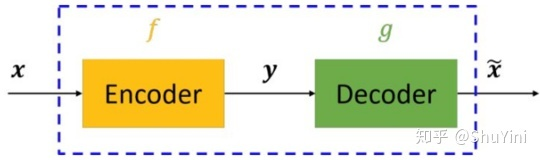

### Code
The following part is the code of Autoencoder.  
Building an autoencoder needs to complete the following three tasks: building an encoder, building a decoder, and setting a loss function to measure the information lost due to compression. Encoders and decoders are generally parameterized equations and are differentiable with respect to loss functions, typically using neural networks.

In [3]:
#Import the base library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import *
from keras import backend as K

In [4]:
# Read the tmnist data
df_train = pd.read_csv('94_character_TMNIST.csv')
df_train.head()
X = df_train.iloc[:, 2:786]

##### Reshape the data
Although we can train a model to recognize pictures. There is a severe limitation on the size of the input image. The majority of convolutional neural networks are made to only accept images that are a specific size. This poses a number of difficulties for the deployment of models and the collection of data. Reshaping the input images to make them suitable for feeding into the networks is a common practice to get around this restriction.

In [5]:
train_pct_index = int(0.8 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
X_train = X_train.values.astype('float32')/255.
X_test = X_test.values.astype('float32')/255.
output_X_train = X_train.reshape(-1,28,28,1)
output_X_test = X_test.reshape(-1,28,28,1)

print(X_train.shape, X_test.shape)

(219274, 784) (54819, 784)


#### Latent space

In [47]:
LATENT_SPACE = 32 

Epoch 1/10
857/857 [==============================] - 8s 9ms/step - loss: 0.1884
Epoch 2/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1546
Epoch 3/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1522
Epoch 4/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1345
Epoch 5/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1347
Epoch 6/10
857/857 [==============================] - 8s 9ms/step - loss: 0.1244
Epoch 7/10
857/857 [==============================] - 8s 9ms/step - loss: 0.1311
Epoch 8/10
857/857 [==============================] - 8s 9ms/step - loss: 0.1227
Epoch 9/10
857/857 [==============================] - 8s 9ms/step - loss: 0.1189
Epoch 10/10
857/857 [==============================] - 8s 9ms/step - loss: 0.1181
(54819, 28, 28, 1)


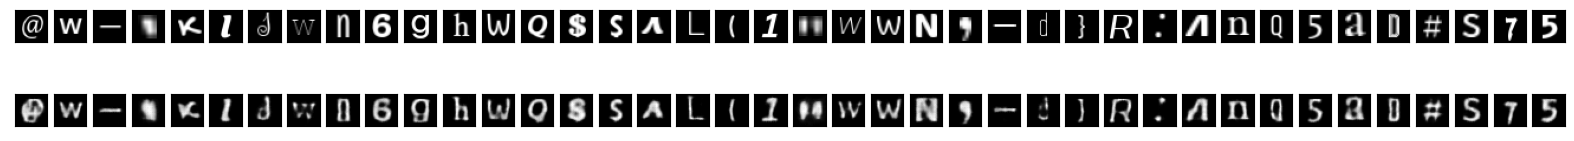

In [48]:
#encoder
encoder_inputs = Input(shape = (28,28,1))
 
conv1 = Conv2D(16, (3,3), activation = 'relu', padding = "SAME")(encoder_inputs)
pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)
conv2 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(pool1)
pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv2)
flat = Flatten()(pool2)
 
encoder_outputs = Dense(LATENT_SPACE, activation = 'relu')(flat)

#AE decoder
dense_layer_d = Dense(7*7*32, activation = 'relu')(encoder_outputs)
output_from_d = Reshape((7,7,32))(dense_layer_d)
conv1_1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(output_from_d)
upsampling_1 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(conv1_1)
upsampling_2 = Conv2DTranspose(16, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
decoded_outputs = Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)

#AE
autoencoder = Model(encoder_inputs, decoded_outputs)

m = 256
n_epoch = 10
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(output_X_train,output_X_train, epochs=n_epoch, batch_size=m, shuffle=True)





test_imgs = autoencoder.predict(output_X_test)
print(test_imgs.shape)




n = 40  # how many digits we will display
plt.figure(figsize=(20, 2))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(output_X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##### Now change latent space to 128

In [7]:
LATENT_SPACE = 128 

Epoch 1/10
857/857 [==============================] - 8s 9ms/step - loss: 0.1879
Epoch 2/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1388
Epoch 3/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1363
Epoch 4/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1269
Epoch 5/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1284
Epoch 6/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1310
Epoch 7/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1286
Epoch 8/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1184
Epoch 9/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1188
Epoch 10/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1183
(54819, 28, 28, 1)


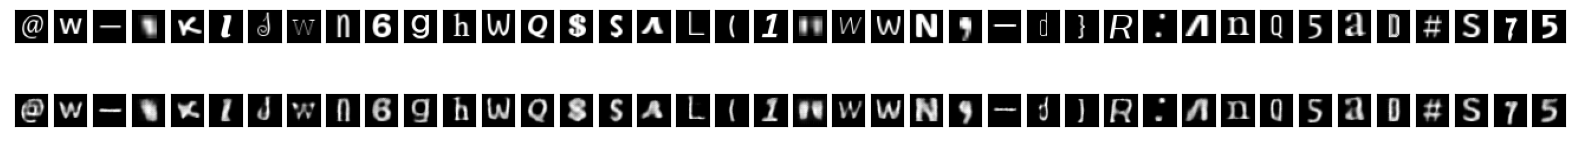

In [8]:
#encoder
encoder_inputs = Input(shape = (28,28,1))
 
conv1 = Conv2D(16, (3,3), activation = 'relu', padding = "SAME")(encoder_inputs)
pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)
conv2 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(pool1)
pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv2)
flat = Flatten()(pool2)
 
encoder_outputs = Dense(LATENT_SPACE, activation = 'relu')(flat)

#AE decoder
dense_layer_d = Dense(7*7*32, activation = 'relu')(encoder_outputs)
output_from_d = Reshape((7,7,32))(dense_layer_d)
conv1_1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(output_from_d)
upsampling_1 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(conv1_1)
upsampling_2 = Conv2DTranspose(16, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
decoded_outputs = Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)

#AE
autoencoder = Model(encoder_inputs, decoded_outputs)

m = 256
n_epoch = 10
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(output_X_train,output_X_train, epochs=n_epoch, batch_size=m, shuffle=True)





test_imgs = autoencoder.predict(output_X_test)
print(test_imgs.shape)




n = 40  # how many digits we will display
plt.figure(figsize=(20, 2))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(output_X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##### Now, let us try latent space = 16

In [9]:
LATENT_SPACE = 16 

Epoch 1/10
857/857 [==============================] - 15s 9ms/step - loss: 0.1933
Epoch 2/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1539
Epoch 3/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1464
Epoch 4/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1610
Epoch 5/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1420
Epoch 6/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1464
Epoch 7/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1418
Epoch 8/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1403
Epoch 9/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1290
Epoch 10/10
857/857 [==============================] - 7s 9ms/step - loss: 0.1295
(54819, 28, 28, 1)


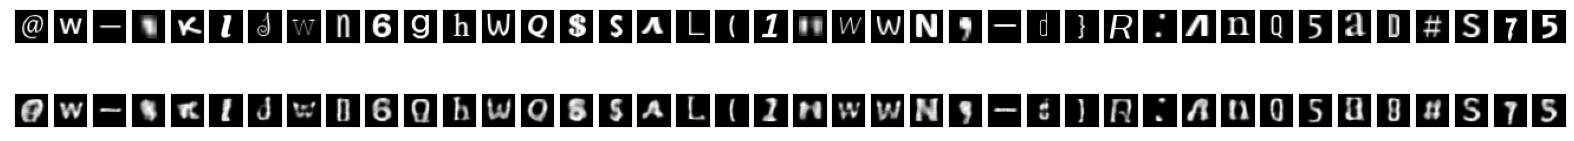

In [6]:
#encoder
encoder_inputs = Input(shape = (28,28,1))
 
conv1 = Conv2D(16, (3,3), activation = 'relu', padding = "SAME")(encoder_inputs)
pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)
conv2 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(pool1)
pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv2)
flat = Flatten()(pool2)
 
encoder_outputs = Dense(LATENT_SPACE, activation = 'relu')(flat)

#AE decoder
dense_layer_d = Dense(7*7*32, activation = 'relu')(encoder_outputs)
output_from_d = Reshape((7,7,32))(dense_layer_d)
conv1_1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(output_from_d)
upsampling_1 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(conv1_1)
upsampling_2 = Conv2DTranspose(16, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
decoded_outputs = Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)

#AE
autoencoder = Model(encoder_inputs, decoded_outputs)

m = 256
n_epoch = 10
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(output_X_train,output_X_train, epochs=n_epoch, batch_size=m, shuffle=True)





test_imgs = autoencoder.predict(output_X_test)
print(test_imgs.shape)




n = 40  # how many digits we will display
plt.figure(figsize=(20, 2))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(output_X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##### Let change latent space back to 32 and try some different combination of network architecture

In [10]:
LATENT_SPACE = 32

Epoch 1/10
857/857 [==============================] - 9s 10ms/step - loss: 0.1879
Epoch 2/10
857/857 [==============================] - 8s 10ms/step - loss: 0.1557
Epoch 3/10
857/857 [==============================] - 8s 10ms/step - loss: 0.1446
Epoch 4/10
857/857 [==============================] - 8s 10ms/step - loss: 0.1442
Epoch 5/10
857/857 [==============================] - 8s 10ms/step - loss: 0.1338
Epoch 6/10
857/857 [==============================] - 8s 10ms/step - loss: 0.1273
Epoch 7/10
857/857 [==============================] - 8s 10ms/step - loss: 0.1373
Epoch 8/10
857/857 [==============================] - 8s 10ms/step - loss: 0.1258
Epoch 9/10
857/857 [==============================] - 8s 10ms/step - loss: 0.1205
Epoch 10/10
857/857 [==============================] - 8s 10ms/step - loss: 0.1237
(54819, 28, 28, 1)


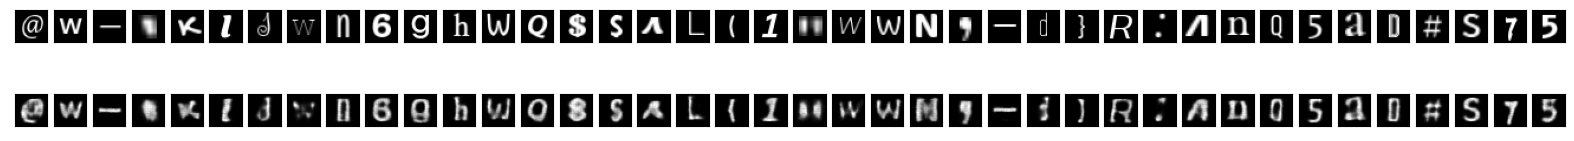

In [11]:
#encoder
encoder_inputs = Input(shape = (28,28,1))
 
conv1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(encoder_inputs)
pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)
conv2 = Conv2D(16, (3,3), activation = 'relu', padding = "SAME")(pool1)
pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv2)
flat = Flatten()(pool2)
 
encoder_outputs = Dense(LATENT_SPACE, activation = 'relu')(flat)

#AE decoder
dense_layer_d = Dense(7*7*32, activation = 'relu')(encoder_outputs)
output_from_d = Reshape((7,7,32))(dense_layer_d)
conv1_1 = Conv2D(64, (3,3), activation = 'relu', padding = "SAME")(output_from_d)
upsampling_1 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(conv1_1)
upsampling_2 = Conv2DTranspose(16, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
decoded_outputs = Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)

#AE
autoencoder = Model(encoder_inputs, decoded_outputs)

m = 256
n_epoch = 10
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(output_X_train,output_X_train, epochs=n_epoch, batch_size=m, shuffle=True)





test_imgs = autoencoder.predict(output_X_test)
print(test_imgs.shape)




n = 40  # how many digits we will display
plt.figure(figsize=(20, 2))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(output_X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
LATENT_SPACE = 64

Epoch 1/10
857/857 [==============================] - 10s 10ms/step - loss: 0.1916
Epoch 2/10
857/857 [==============================] - 9s 10ms/step - loss: 0.1639
Epoch 3/10
857/857 [==============================] - 9s 10ms/step - loss: 0.1474
Epoch 4/10
857/857 [==============================] - 9s 10ms/step - loss: 0.1369
Epoch 5/10
857/857 [==============================] - 9s 10ms/step - loss: 0.1331
Epoch 6/10
857/857 [==============================] - 10s 11ms/step - loss: 0.1365
Epoch 7/10
857/857 [==============================] - 9s 11ms/step - loss: 0.1388
Epoch 8/10
857/857 [==============================] - 9s 11ms/step - loss: 0.1271
Epoch 9/10
857/857 [==============================] - 9s 10ms/step - loss: 0.1327
Epoch 10/10
857/857 [==============================] - 14s 17ms/step - loss: 0.1265
(54819, 28, 28, 1)


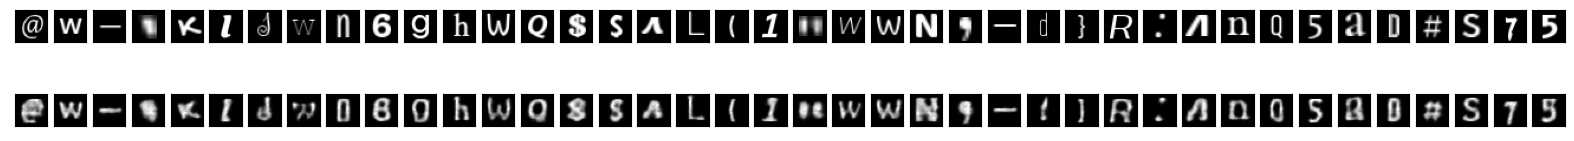

In [9]:
#encoder
encoder_inputs = Input(shape = (28,28,1))
 
conv1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(encoder_inputs)
pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)
conv2 = Conv2D(16, (3,3), activation = 'relu', padding = "SAME")(pool1)
pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv2)
flat = Flatten()(pool2)
 
encoder_outputs = Dense(LATENT_SPACE, activation = 'relu')(flat)

#AE decoder
dense_layer_d = Dense(7*7*32, activation = 'relu')(encoder_outputs)
output_from_d = Reshape((7,7,32))(dense_layer_d)
conv1_1 = Conv2D(64, (3,3), activation = 'relu', padding = "SAME")(output_from_d)
upsampling_1 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(conv1_1)
upsampling_2 = Conv2DTranspose(16, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
decoded_outputs = Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)

#AE
autoencoder = Model(encoder_inputs, decoded_outputs)

m = 256
n_epoch = 10
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(output_X_train,output_X_train, epochs=n_epoch, batch_size=m, shuffle=True)





test_imgs = autoencoder.predict(output_X_test)
print(test_imgs.shape)




n = 40  # how many digits we will display
plt.figure(figsize=(20, 2))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(output_X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Report

#### Three components of Autoencoders:
1. Encoder: A component that shrinks the input data from the train-validate-test set into an encoded representation that is typically several orders of magnitude smaller. The encoder can get the essence of the original data, and then we only need to create a small neural network to learn the essence of the data, which not only reduces the burden on the neural network, but also achieves good results
2. Bottleneck: A module that is the most crucial component of the network because it contains the compressed knowledge representations.
3. Decoder: A component that aids the network in "decompressing" knowledge representations and recovering the data from its encoded state. Next, the output is contrasted with a source of truth.
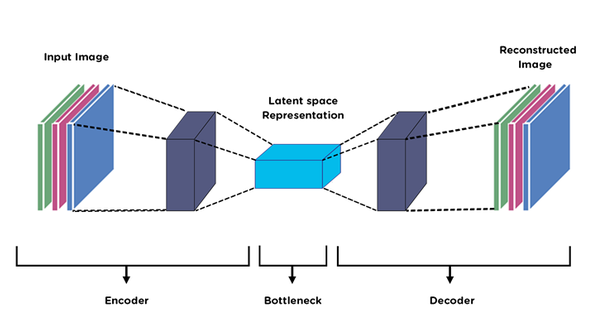
#### Latent space
- A latent space is a representation of compressed data. The role of latent space is to learn data features and simplify data representation in order to find patterns.  
- The purpose of data compression is to learn the more important information in the data. Taking the autoencoder as an example, we regard the dimensionality reduction of data in feature extraction as a kind of lossy compression. But since the decoder needs to reconstruct the data, the model must learn how to store all relevant information and ignore noise. So the advantage of compression (dimension reduction) is that you can remove redundant information and focus on the most critical features.  
- In this assignment, I tried Latent space = 16, 32, 64, and 128.  

#### Observe the  output
1. After 10 epochs, when the latent space is set to 32, most of the generated images can well show the characteristics of the original image. But it can also be observed that when generating graphics such as @, many details are ignored and not displayed.  
2. When we adjust the latent space to 128, after 10 epochs, we can find that compared with the prison latent space = 32, there has been a significant improvement in the display of details, and various details can also be well reflected come out.  
3. When we adjust LATENT_SPACE = 16. Many details cannot be captured, such as the letter K turning into a white mass in the image we generated. \$ is more like an Arabic numeral 8 in our generated image. Whether we want to compare with LATENT_SPACE = 32 or 128, the performance is not very good.
4. In the next attempt, I adjusted the latent space back to 32 and made some changes to the network architecture. After this adjustment, we can find that symbols such as @ or K and others perform well. Especially compared to the case where the latent space is the same but the network architecture is not changed, the performance is improved.  
5. In the last attempt, we kept the network architecture the same as last time, but changed the latent space to 64. On this basis, 40 pictures are generated and compared with the previous results. It can be found that the results have not improved significantly compared with the previous one.  

##### Summarize
The latent space is 32, and the network architecture used in the fourth experiment is adopted. Higher quality pictures can be obtained while maintaining faster efficiency.

### Reference:
1. 一文带你了解自编码器（AutoEncoder） https://zhuanlan.zhihu.com/p/80377698
2. Latent Space 隐空间 https://zhuanlan.zhihu.com/p/364331726
3. mnist_ae_vae https://www.kaggle.com/code/monilkataria/mnist-ae-vae/notebook

### License
MIT License

Copyright (c) 2022 Jiachi Sun

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.